In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [2]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [3]:
month = date(2022, 1, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2022, 1, 1), datetime.date(2022, 1, 31))

In [4]:
bom
eom

datetime.date(2022, 1, 1)

datetime.date(2022, 1, 31)

In [5]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-01-31" 
ORDER BY amount DESC



In [6]:
df = pd.read_sql(sql, conn)
df

,date,amount,item,kind
0,2022-01-31,10000,Parent,Parent
1,2022-01-31,10000,Merit Making,Others
2,2022-01-31,640,Internet Home,Communication
3,2022-01-31,600,CCF,Luxury
4,2022-01-31,340,Packt,Edutainment
5,2022-01-31,320,Telephone Dtac,Communication
6,2022-01-31,190,Monthly Prime,Movies
7,2022-01-31,170,Google,Edutainment
8,2022-01-31,100,Apple,Edutainment
9,2022-01-31,70,Patreon,Edutainment


In [7]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-01-31" 
ORDER BY amount DESC



In [8]:
df_eom = pd.read_sql(sql, conn)
df_eom

,date,amount,item,kind
0,2022-01-31,10000,Parent,Parent
1,2022-01-31,10000,Merit Making,Others
2,2022-01-31,640,Internet Home,Communication
3,2022-01-31,600,CCF,Luxury
4,2022-01-31,340,Packt,Edutainment
5,2022-01-31,320,Telephone Dtac,Communication
6,2022-01-31,190,Monthly Prime,Movies
7,2022-01-31,170,Google,Edutainment
8,2022-01-31,100,Apple,Edutainment
9,2022-01-31,70,Patreon,Edutainment


In [9]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2022-01-01" AND "2022-01-31" 
ORDER BY date



In [10]:
df_t = pd.read_sql(sql, conn)
df_t.head()

,date,amount,item,kind
0,2022-01-02,2430,Food,Food
1,2022-01-06,780,Pets,Pets
2,2022-01-07,1330,Medicine,Medicine
3,2022-01-07,200,Transportation,Transportation
4,2022-01-08,2020,Parent,Parent


In [11]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple                 140
Books & Software      330
CCF                   600
Food                 6300
Fuel                 1160
Google                170
Internet Home         640
Medicine             4510
Merit Making        10000
Monthly Prime         190
Mother               4120
Packt                 340
Parent              12020
Patreon                70
Personal Care        1490
Pets                15390
Telephone Dtac        320
Transportation        470
Yearly Dropbox       4450
Name: amount, dtype: int64

In [12]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Apparel            1490
Communication       960
Edutainment        5500
Food               6300
Luxury              600
Medicine           4510
Movies              190
Others            10000
Parent            16140
Pets              15390
Transportation     1630
Name: amount, dtype: int64

In [13]:
expense = grouped.amount.sum()
sum(expense)

62710

<Figure size 864x864 with 0 Axes>

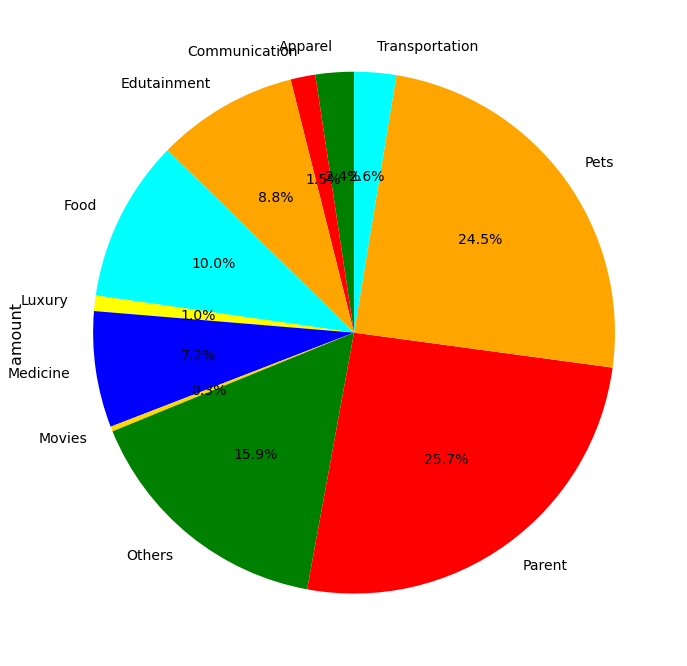

In [14]:
fig_path = "../fig/Expense-2201.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [15]:
expense.to_csv("../data/expense-2201.csv")

In [16]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-01-31" 
ORDER BY date



In [17]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [18]:
df_tmp.to_csv("../data/expense-eom.csv")